In [1]:
import numpy as np
import scipy.linalg as splin
from scipy.integrate import LSODA, solve_ivp
import matplotlib.pyplot as plt

from consts import *
from lyapunov import *
from pac import *
from potential import *
from lyap_obj import *

from manifold import *

In [2]:
# Load orbits from file
L1_0 = load_orbit("out/L1_0.npz")
L1_1 = load_orbit("out/L1_1.npz")

L2_0 = load_orbit("out/L2_0.npz")
L2_1 = load_orbit("out/L2_1.npz")

L1_orbits = [L1_0, L1_1]
L2_orbits = [L2_0, L2_1]

In [3]:
manL1 = Manifold(L1_0)



In [4]:
_ = manL1.compute_manifold(30, terminal=False)

Curve 1/30 computed
Curve 2/30 computed
Curve 3/30 computed
Curve 4/30 computed
Curve 5/30 computed
Curve 6/30 computed
Curve 7/30 computed
Curve 8/30 computed
Curve 9/30 computed
Curve 10/30 computed
Curve 11/30 computed
Curve 12/30 computed
Curve 13/30 computed
Curve 14/30 computed
Curve 15/30 computed
Curve 16/30 computed
Curve 17/30 computed
Curve 18/30 computed
Curve 19/30 computed
Curve 20/30 computed
Curve 21/30 computed
Curve 22/30 computed
Curve 23/30 computed
Curve 24/30 computed
Curve 25/30 computed
Curve 26/30 computed
Curve 27/30 computed
Curve 28/30 computed
Curve 29/30 computed
Curve 30/30 computed


(np.float64(-2.437743579261933),
 np.float64(2.0),
 np.float64(-2.0),
 np.float64(2.6467804135036825))

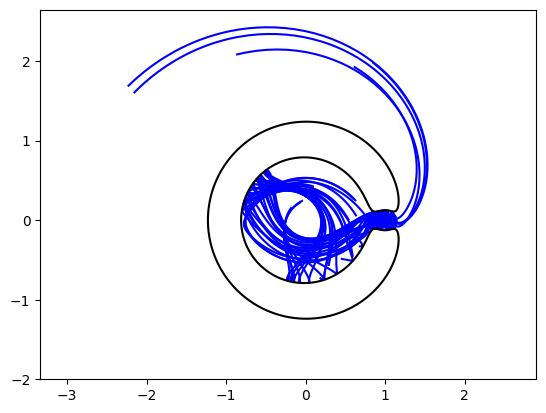

In [5]:
kw = {"color": "blue"}

ax = manL1.plot_stable(30, **kw)
ax = manL1.plot_ZVC(ax=ax)
ax.axis("equal")

In [6]:
def EPS(S, tol):
    # Poincare section at x = 1 - mu
    x_s = 1 - muEM
    # In theory we place the section plane at x and call it a day, 
    # but in practice we need to account for the fact that the section
    # cannot be infinite on the y axis or it catches unwanted solutions
    # So we limit y to +/- 0.25, well inside the ZVC at 1-mu

    y_lim = 0.25

    # Compute the distance to the section
    dist_x = np.abs(S[0] - x_s)
    dist_y = np.abs(S[1] - y_lim)

    if dist_x < tol and abs(S[1]) < y_lim:
        return True
    else:
        return False

In [7]:
cuts, surs, cutu, suru = manL1.surface_hit(EPS, 1e-3)

In [8]:
print(len(cuts), len(cutu))

60 60


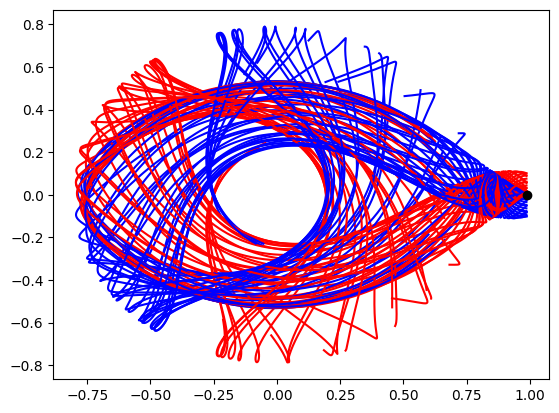

In [9]:
# Plot the cuts
plt.figure()
for i in range(len(cuts)):
    plt.plot(cuts[i][0], cuts[i][1], "r",)
    plt.plot(cutu[i][0], cutu[i][1], "b",)

plt.plot([1-muEM], [0], "ko")
plt.show()

In [10]:
# Plot yv cut at Poincare section
plt.figure()
for i in range(len(surs)):
    plt.plot(surs[i][1], surs[i][3], "ro", markersize=3)
plt.show()

TypeError: 'NoneType' object is not subscriptable

<Figure size 640x480 with 0 Axes>